In [6]:
# mnist (benchmark) dataset

# It is a dataset of handwritten images

# http://yann.lecun.com/exdb/mnist/


# The MNIST database of handwritten digits, available from this page, has a training set of 60,000 examples, 
# and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been
# size-normalized and centered in a fixed-size image.

# It is a good database for people who want to try learning techniques and pattern recognition methods on real-world 
# data while spending minimal efforts on preprocessing and formatting.'''


In [7]:
import numpy as np 
import keras  
from keras.datasets import mnist 
from keras.models import Model 
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten 
from keras import backend as k 

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() 

11493376/11490434 [==============================] - 8s 1us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


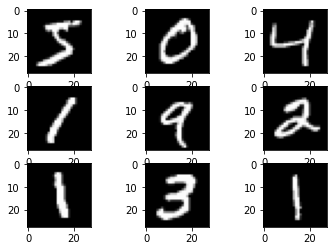

In [9]:
# Display the dataset
from matplotlib import pyplot
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(x_train[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [10]:
img_rows, img_cols=28, 28
  
if k.image_data_format() == 'channels_first': 
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols) 
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols) 
   inpx = (1, img_rows, img_cols) 
else:
  #reshape dataset to have a single channel
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1) 
   inpx = (img_rows, img_cols, 1)

In [11]:
#convert from integers to floats
x_train = x_train.astype('float32') 
x_test = x_test.astype('float32') 

# Nor. 0 to 1
x_train /= 255
x_test /= 255

In [12]:
# convert class vectors to binary class matrices  OR one hot encode target values
y_train = keras.utils.to_categorical(y_train) 
y_test = keras.utils.to_categorical(y_test) 

In [13]:
inpx = Input(shape=inpx) 
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx) 
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1) 
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2) 
# To prevent overfitting 
layer4 = Dropout(0.5)(layer3)
 
layer5 = Flatten()(layer4) 
layer6 = Dense(250, activation='sigmoid')(layer5) 
layer7 = Dense(10, activation='softmax')(layer6) 

In [14]:
model = Model([inpx], layer7) 
model.compile(optimizer=keras.optimizers.Adadelta(), 
              loss=keras.losses.categorical_crossentropy, 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500) 

Epoch 1/12
60000/60000 [==============================] - 127s 2ms/step - loss: 0.6974 - accuracy: 0.7840
Epoch 2/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.2181 - accuracy: 0.9383
Epoch 3/12
60000/60000 [==============================] - 143s 2ms/step - loss: 0.1299 - accuracy: 0.9632
Epoch 4/12
60000/60000 [==============================] - 134s 2ms/step - loss: 0.0941 - accuracy: 0.9730
Epoch 5/12
60000/60000 [==============================] - 131s 2ms/step - loss: 0.0757 - accuracy: 0.9777
Epoch 6/12
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0637 - accuracy: 0.9809
Epoch 7/12
60000/60000 [==============================] - 145s 2ms/step - loss: 0.0555 - accuracy: 0.9833
Epoch 8/12
60000/60000 [==============================] - 150s 3ms/step - loss: 0.0502 - accuracy: 0.9852
Epoch 9/12
60000/60000 [==============================] - 144s 2ms/step - loss: 0.0459 - accuracy: 0.9863
Epoch 10/12
60000/60000 [=====================

In [15]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('loss=', score[0]) 
print('accuracy=', score[1])


loss= 0.02988369712878484
accuracy= 0.9898999929428101


In [24]:
#sinle Value predication in number
predictions = model.predict(x_test)
print(np.argmax(np.round(predictions[9])))


9


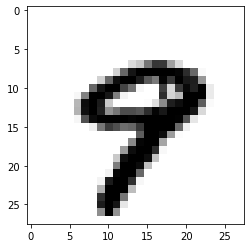

In [26]:
#sinle Value predication in graph (plot)
import matplotlib.pyplot as plt
plt.imshow(x_test[9].reshape(28, 28), cmap = plt.cm.binary)
plt.show()


In [29]:
################-------------End----------------

In [30]:
################Fashion MNIST

In [31]:
# Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. 
# Each example is a 28x28 grayscale image, associated with a label from 10 classes.


'''Labels

Each training and test example is assigned to one of the following labels:

0 T-shirt/top
1 Trouser
2 Pullover
3 Dress
4 Coat
5 Sandal
6 Shirt
7 Sneaker
8 Bag
9 Ankle boot '''

# for further assistance https://www.kaggle.com/zalando-research/fashionmnist


'Labels\n\nEach training and test example is assigned to one of the following labels:\n\n0 T-shirt/top\n1 Trouser\n2 Pullover\n3 Dress\n4 Coat\n5 Sandal\n6 Shirt\n7 Sneaker\n8 Bag\n9 Ankle boot '

In [1]:
import keras
from keras.datasets import fashion_mnist 
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

(train_X,train_Y), (test_X,test_Y) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 25s 6us/step


Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


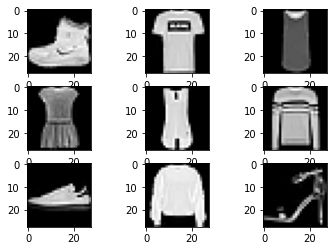

In [2]:
# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [3]:
# reshape dataset to have a single channel
train_X = train_X.reshape(-1, 28,28, 1)
test_X = test_X.reshape(-1, 28,28, 1)

##convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

#Nor. 0 to 1
train_X = train_X / 255
test_X = test_X / 255

# convert to one hot encoder (vector)
train_Y_one_hot = to_categorical(train_Y)
test_Y_one_hot = to_categorical(test_Y)


In [4]:

model = Sequential()

model.add(Conv2D(64, (3,3), input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])


In [5]:
model.fit(train_X, train_Y_one_hot, batch_size=64, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.4695 - accuracy: 0.8299
Epoch 2/5
60000/60000 [==============================] - 89s 1ms/step - loss: 0.3180 - accuracy: 0.8852
Epoch 3/5
60000/60000 [==============================] - 91s 2ms/step - loss: 0.2790 - accuracy: 0.8984
Epoch 4/5
60000/60000 [==============================] - 92s 2ms/step - loss: 0.2525 - accuracy: 0.9081
Epoch 5/5
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2329 - accuracy: 0.9149 0s - loss: 0.2330 - accuracy: 0.


In [6]:
test_loss, test_acc = model.evaluate(test_X, test_Y_one_hot)
print('Test loss', test_loss)
print('Test accuracy', test_acc)



10000/10000 [==============================] - 5s 466us/step
Test loss 0.28417854043245316
Test accuracy 0.8944000005722046


In [9]:
#sinle Value predication in number (category)
predictions = model.predict(test_X)
print(np.argmax(np.round(predictions[3])))

1


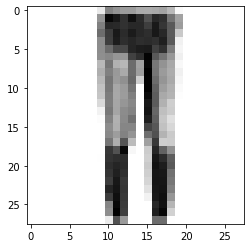

In [10]:
#sinle Value predication in graph (plot)
plt.imshow(test_X[3].reshape(28, 28), cmap = plt.cm.binary)
plt.show()